In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
import deepmatcher as dm
import pandas as pd
import pickle
from tqdm import tqdm
import numpy as np

In [4]:
from utils.attacker import getDictionary
from utils.glove_utils import loadGloveModel,getTopClosest
from utils.attacker import attackDataset

In [5]:
import nltk
from nltk.corpus import stopwords

## Load Glove dictionary with counter-fitted vectors and stopwords

In [10]:
stop_words = set(stopwords.words('english'))

In [11]:
gloveModel2 = loadGloveModel('counter-fitted-vectors.txt')
embeddings2 = list(gloveModel2.values())
embedding_mat2 = np.array(embeddings2)

Loading Glove Model
Done. 65713  words loaded!


## Attack single attribute

In [7]:
train_df = pd.read_csv('datasets/Structured/itunes-amazon/merged_train.csv')
validation_df = pd.read_csv('datasets/Structured/itunes-amazon/merged_valid.csv')
test_df = pd.read_csv('datasets/Structured/itunes-amazon/merged_test.csv')

In [8]:
wordDict = getDictionary([train_df,validation_df,test_df])
len(wordDict)

1828

In [9]:
closest_words_map,notfound = getTopClosest(wordDict,gloveModel2,embedding_matrix=embedding_mat2
                                           ,maxDistance=0.4)

100%|██████████| 1828/1828 [01:43<00:00, 17.65it/s]


In [10]:
len(notfound)

407

In [11]:
with open('closest_words_itam.pickle', 'wb') as handle:
    pickle.dump(closest_words_map, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [18]:
with open('notfound_words_itam.data','wb') as handle:
    pickle.dump(notfound,handle)

In [ ]:
with open('closest_words.pickle', 'rb') as handle:
    closest_words_map = pickle.load(handle)

In [ ]:
with open('notfound_words.data', 'rb') as handle:
    notfound = pickle.load(handle)

### Itunes-Amazon

In [12]:
attributes = [col for col in list(test_df) if col not in ['id','label']]
itunesamazon_model = dm.MatchingModel(attr_summarizer='hybrid')
itunesamazon_model.load_state('models/itunes_amazon_hybrid.pth')
itunesamazon_model = itunesamazon_model.cuda()

In [13]:
test_positives = test_df[test_df.label==1]
test_negatives = test_df[test_df.label==0]

In [14]:
attack_stats_forpos = attackDataset(test_positives,itunesamazon_model,attributes,closest_words_map,notfound,stop_words)

100%|██████████| 27/27 [00:05<00:00,  4.90it/s]

Reading and processing data from "temp/test.csv"
0% [########################### ] 100% | ETA: 00:00:00

===>  PREDICT Epoch 6



Reading and processing data from "temp/test.csv"


Finished Epoch 6 || Run Time:    0.2 | Load Time:    0.2 || F1:   0.00 | Prec:   0.00 | Rec:   0.00 || Ex/s:   0.00



0% [############################# ] 100% | ETA: 00:00:00

===>  PREDICT Epoch 6


0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:37
 11%|█         | 3/27 [00:00<00:00, 25.59it/s]

Finished Epoch 6 || Run Time:   23.6 | Load Time:   14.2 || F1:   0.00 | Prec:   0.00 | Rec:   0.00 || Ex/s:   0.00



100%|██████████| 27/27 [00:01<00:00, 23.20it/s]


In [15]:
attack_stats_forneg = attackDataset(test_df,itunesamazon_model,attributes,closest_words_map,notfound,stop_words)

100%|██████████| 109/109 [00:23<00:00,  4.62it/s]

Reading and processing data from "temp/test.csv"
0% [############################# ] 100% | ETA: 00:00:00

===>  PREDICT Epoch 6
Finished Epoch 6 || Run Time:    0.9 | Load Time:    0.8 || F1:   0.00 | Prec:   0.00 | Rec:   0.00 || Ex/s:   0.00




Reading and processing data from "temp/test.csv"
0% [##############################] 100% | ETA: 00:00:00

===>  PREDICT Epoch 6


0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:03:48


Finished Epoch 6 || Run Time:  140.7 | Load Time:   88.1 || F1:   0.00 | Prec:   0.00 | Rec:   0.00 || Ex/s:   0.00



100%|██████████| 109/109 [00:08<00:00, 13.28it/s]


In [19]:
attack_stats_forpos.describe()

,ltable_Song_Name,ltable_Artist_Name,ltable_Album_Name,ltable_Genre,ltable_Price,ltable_CopyRight,ltable_Time,ltable_Released,rtable_Song_Name,rtable_Artist_Name,rtable_Album_Name,rtable_Genre,rtable_Price,rtable_CopyRight,rtable_Time,rtable_Released
count,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
unique,2,2,1,1,2,1,2,1,2,2,1,1,2,1,2,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,26,26,27,27,25,27,14,27,26,26,27,27,25,27,14,27


In [ ]:
attack_stats_forneg.describe()

### Beer Advo

In [22]:
train_df = pd.read_csv('datasets/Structured/Beer/merged_train.csv')
validation_df = pd.read_csv('datasets/Structured/Beer/merged_valid.csv')
test_df = pd.read_csv('datasets/Structured/Beer/merged_test.csv')

In [23]:
wordDict = getDictionary([train_df,validation_df,test_df])
len(wordDict)

1211

In [24]:
closest_words_map,notfound = getTopClosest(wordDict,gloveModel2,embedding_matrix=embedding_mat2
                                           ,maxDistance=0.25)

100%|██████████| 1211/1211 [01:08<00:00, 17.77it/s]


In [25]:
with open('closest_words_beer.pickle', 'wb') as handle:
    pickle.dump(closest_words_map, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [26]:
with open('notfound_words_beer.data','wb') as handle:
    pickle.dump(notfound,handle)

In [27]:
beer_model = dm.MatchingModel(attr_summarizer='hybrid')
beer_model.load_state('models/beer_hybrid.pth')
beer_model = beer_model.cuda()

In [28]:
attributes = [col for col in list(test_df) if col not in ['id','label']]
test_positives = test_df[test_df.label==1]
test_negatives = test_df[test_df.label==0]

In [29]:
attack_stats_forpos = attackDataset(test_positives,beer_model,attributes,closest_words_map,notfound,stop_words)

100%|██████████| 14/14 [00:01<00:00, 13.56it/s]

Reading and processing data from "temp/test.csv"
0% [#############  ] 100% | ETA: 00:00:00

===>  PREDICT Epoch 6



Reading and processing data from "temp/test.csv"


Finished Epoch 6 || Run Time:    0.1 | Load Time:    0.0 || F1:   0.00 | Prec:   0.00 | Rec:   0.00 || Ex/s:   0.00



0% [############################# ] 100% | ETA: 00:00:00

===>  PREDICT Epoch 6


0% [█████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:03
 21%|██▏       | 3/14 [00:00<00:00, 23.98it/s]

Finished Epoch 6 || Run Time:    3.0 | Load Time:    1.5 || F1:   0.00 | Prec:   0.00 | Rec:   0.00 || Ex/s:   0.00



100%|██████████| 14/14 [00:00<00:00, 31.08it/s]


In [30]:
attack_stats_forneg = attackDataset(test_negatives,beer_model,attributes,closest_words_map,notfound,stop_words)

100%|██████████| 77/77 [00:06<00:00, 11.93it/s]

Reading and processing data from "temp/test.csv"
0% [############################# ] 100% | ETA: 00:00:00

===>  PREDICT Epoch 6



Reading and processing data from "temp/test.csv"


Finished Epoch 6 || Run Time:    0.3 | Load Time:    0.2 || F1:   0.00 | Prec:   0.00 | Rec:   0.00 || Ex/s:   0.00



0% [############################# ] 100% | ETA: 00:00:00

===>  PREDICT Epoch 6


0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:30
  0%|          | 0/77 [00:00<?, ?it/s]

Finished Epoch 6 || Run Time:   19.9 | Load Time:   10.5 || F1:   0.00 | Prec:   0.00 | Rec:   0.00 || Ex/s:   0.00



100%|██████████| 77/77 [00:02<00:00, 31.70it/s]


In [31]:
attack_stats_forneg.describe()

,ltable_Beer_Name,ltable_Brew_Factory_Name,ltable_Style,ltable_ABV,rtable_Beer_Name,rtable_Brew_Factory_Name,rtable_Style,rtable_ABV
count,77,77,77,77,77,77,77,77
unique,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False
freq,72,71,73,73,72,72,73,73


In [32]:
attack_stats_forpos.describe()

,ltable_Beer_Name,ltable_Brew_Factory_Name,ltable_Style,ltable_ABV,rtable_Beer_Name,rtable_Brew_Factory_Name,rtable_Style,rtable_ABV
count,14,14,14,14,14,14,14,14
unique,2,2,2,2,2,2,2,2
top,True,False,False,False,True,True,False,False
freq,7,8,8,9,8,8,9,9


### Walmart-Amazon

In [33]:
train_df = pd.read_csv('datasets/Structured/Walmart-Amazon/merged_train.csv')
validation_df = pd.read_csv('datasets/Structured/Walmart-Amazon/merged_valid.csv')
test_df = pd.read_csv('datasets/Structured/Walmart-Amazon/merged_test.csv')

In [34]:
wordDict = getDictionary([train_df,validation_df,test_df])
len(wordDict)

11465

In [36]:
closest_words_map,notfound = getTopClosest(wordDict,gloveModel2,embedding_matrix=embedding_mat2
                                           ,maxDistance=0.4)

100%|██████████| 11465/11465 [03:21<00:00, 56.88it/s] 


In [37]:
with open('closest_words_walam.pickle', 'wb') as handle:
    pickle.dump(closest_words_map, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [38]:
with open('notfound_walam.data', 'wb') as handle:
    pickle.dump(notfound, handle)

In [39]:
walmartamazon_model = dm.MatchingModel(attr_summarizer='hybrid')
walmartamazon_model.load_state('models/walmartamazon_hybrid.pth')
walmartamazon_model.cuda()
attributes = [col for col in list(test_df) if col not in ['id','label']]

In [40]:
test_negatives = test_df[test_df.label==0]
test_positives = test_df[test_df.label==1]

In [41]:
attack_stats_forneg = attackDataset(test_negatives,walmartamazon_model,attributes,closest_words_map,notfound,stop_words)

100%|██████████| 1856/1856 [04:09<00:00,  7.45it/s]

Reading and processing data from "temp/test.csv"
0% [############################# ] 100% | ETA: 00:00:00

===>  PREDICT Epoch 13


0% [███████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:11


Finished Epoch 13 || Run Time:    7.8 | Load Time:    4.6 || F1:   0.00 | Prec:   0.00 | Rec:   0.00 || Ex/s:   0.00




Reading and processing data from "temp/test.csv"
0% [##############################] 100% | ETA: 00:00:00

===>  PREDICT Epoch 13


0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:18:50


Finished Epoch 13 || Run Time:  766.9 | Load Time:  364.3 || F1:   0.00 | Prec:   0.00 | Rec:   0.00 || Ex/s:   0.00



100%|██████████| 1856/1856 [01:13<00:00, 25.31it/s]


In [42]:
attack_stats_forpos = attackDataset(test_positives,walmartamazon_model,attributes,closest_words_map,notfound,stop_words)

100%|██████████| 193/193 [00:23<00:00,  8.05it/s]

Reading and processing data from "temp/test.csv"
0% [############################# ] 100% | ETA: 00:00:00

===>  PREDICT Epoch 13


0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:01


Finished Epoch 13 || Run Time:    0.9 | Load Time:    0.5 || F1:   0.00 | Prec:   0.00 | Rec:   0.00 || Ex/s:   0.00




Reading and processing data from "temp/test.csv"
0% [############################# ] 100% | ETA: 00:00:00

===>  PREDICT Epoch 13


0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:01:43
  0%|          | 0/193 [00:00<?, ?it/s]

Finished Epoch 13 || Run Time:   71.1 | Load Time:   33.4 || F1:   0.00 | Prec:   0.00 | Rec:   0.00 || Ex/s:   0.00



100%|██████████| 193/193 [00:06<00:00, 28.25it/s]


In [43]:
attack_stats_forneg.describe()

,ltable_title,ltable_category,ltable_brand,ltable_modelno,ltable_price,rtable_title,rtable_category,rtable_brand,rtable_modelno,rtable_price
count,1856,1856,1856,1856,1856,1856,1856,1856,1856,1856
unique,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False
freq,1737,1843,1828,1808,1817,1746,1844,1830,1781,1804


In [44]:
attack_stats_forpos.describe()

,ltable_title,ltable_category,ltable_brand,ltable_modelno,ltable_price,rtable_title,rtable_category,rtable_brand,rtable_modelno,rtable_price
count,193,193,193,193,193,193,193,193,193,193
unique,2,1,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False
freq,162,193,184,119,182,161,192,186,97,179


### Amazon Google

In [6]:
train_df = pd.read_csv('datasets/Structured/Amazon-Google/merged_train.csv')
validation_df = pd.read_csv('datasets/Structured/Amazon-Google/merged_valid.csv')
test_df = pd.read_csv('datasets/Structured/Amazon-Google/merged_test.csv')

In [7]:
test_pos = test_df[test_df.label==1]
test_neg = test_df[test_df.label==0]

In [8]:
wordDict = getDictionary([train_df,validation_df,test_df])
len(wordDict)

4007

In [12]:
closest_words_map,notfound = getTopClosest(wordDict,gloveModel2,embedding_matrix=embedding_mat2
                                           ,maxDistance=0.4)

100%|██████████| 4007/4007 [01:17<00:00, 51.65it/s]


In [13]:
with open('closest_words_google.pickle', 'wb') as handle:
    pickle.dump(closest_words_map, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [10]:
amazongoogle_model = dm.MatchingModel(attr_summarizer='hybrid')
amazongoogle_model.load_state('models/amazongoogle_hybrid.pth')
amazongoogle_model.cuda()
attributes = [col for col in list(test_df) if col not in ['id','label']]

In [13]:
attack_stats_forneg = attackDataset(test_neg,amazongoogle_model,attributes,closest_words_map,
                                    notfound,stop_words)

100%|██████████| 2059/2059 [01:25<00:00, 24.14it/s]

Reading and processing data from "temp/test.csv"
0% [############################# ] 100% | ETA: 00:00:00

===>  PREDICT Epoch 2


0% [█████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:06


Finished Epoch 2 || Run Time:    3.8 | Load Time:    2.3 || F1:   0.00 | Prec:   0.00 | Rec:   0.00 || Ex/s:   0.00




Reading and processing data from "temp/test.csv"
0% [##############################] 100% | ETA: 00:00:00

===>  PREDICT Epoch 2


0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:05:07


Finished Epoch 2 || Run Time:  207.5 | Load Time:  100.2 || F1:   0.00 | Prec:   0.00 | Rec:   0.00 || Ex/s:   0.00



100%|██████████| 2059/2059 [00:29<00:00, 69.76it/s]


In [15]:
attack_stats_forpos = attackDataset(test_pos,amazongoogle_model,attributes,closest_words_map,
                                    notfound,stop_words)

100%|██████████| 234/234 [00:11<00:00, 20.93it/s]

Reading and processing data from "temp/test.csv"
0% [############################# ] 100% | ETA: 00:00:00

===>  PREDICT Epoch 2



Reading and processing data from "temp/test.csv"


Finished Epoch 2 || Run Time:    0.1 | Load Time:    0.4 || F1:   0.00 | Prec:   0.00 | Rec:   0.00 || Ex/s:   0.00



0% [############################# ] 100% | ETA: 00:00:00

===>  PREDICT Epoch 2


0% [█████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:16
  3%|▎         | 7/234 [00:00<00:03, 68.58it/s]

Finished Epoch 2 || Run Time:    2.8 | Load Time:   14.6 || F1:   0.00 | Prec:   0.00 | Rec:   0.00 || Ex/s:   0.00



100%|██████████| 234/234 [00:03<00:00, 69.08it/s]


In [16]:
attack_stats_forneg.describe()

,ltable_title,ltable_manufacturer,ltable_price,rtable_title,rtable_manufacturer,rtable_price
count,2059,2059,2059,2059,2059,2059
unique,2,2,2,2,2,2
top,False,False,False,False,False,False
freq,1610,2010,1997,1612,1988,2000


In [17]:
attack_stats_forpos.describe()

,ltable_title,ltable_manufacturer,ltable_price,rtable_title,rtable_manufacturer,rtable_price
count,234,234,234,234,234,234
unique,2,2,2,2,2,2
top,False,False,False,False,False,False
freq,146,230,232,160,229,232


### DBLP-ACM

In [6]:
train_df = pd.read_csv('datasets/Structured/DBLP-ACM/merged_train.csv')
validation_df = pd.read_csv('datasets/Structured/DBLP-ACM/merged_validation.csv')
test_df = pd.read_csv('datasets/Structured/DBLP-ACM/merged_test.csv')

In [7]:
test_neg = test_df[test_df.label==0]
test_pos = test_df[test_df.label==1]

In [8]:
wordDict = getDictionary([train_df,validation_df,test_df])
len(wordDict)

7849

In [10]:
closest_words_map,notfound = getTopClosest(wordDict,gloveModel2,embedding_matrix=embedding_mat2
                                           ,maxDistance=0.25)

100%|██████████| 7849/7849 [03:04<00:00, 42.43it/s]


In [11]:
with open('closest_words_map_dbacm.pickle', 'wb') as handle:
    pickle.dump(closest_words_map, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [12]:
with open('notfound_dbacm.data', 'wb') as handle:
    pickle.dump(notfound, handle)

In [9]:
with open('closest_words_map_dbacm.pickle', 'rb') as handle:
    closest_words_map = pickle.load(handle)

In [10]:
with open('notfound_dbacm.data', 'rb') as handle:
    notfound = pickle.load(handle)

In [11]:
dblpacm_model = dm.MatchingModel(attr_summarizer='hybrid')
dblpacm_model.load_state('models/dblp_acm_hybrid2.pth')
dblacm_model = dblpacm_model.cuda()
attributes = [col for col in list(test_df) if col not in ['id','label']]

In [12]:
attack_stats_forneg = attackDataset(test_neg,dblpacm_model,attributes,closest_words_map,notfound,stop_words)

100%|██████████| 2029/2029 [01:39<00:00, 20.38it/s]

Reading and processing data from "temp/test.csv"
0% [############################# ] 100% | ETA: 00:00:00

===>  PREDICT Epoch 7


0% [████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:08


Finished Epoch 7 || Run Time:    4.5 | Load Time:    5.0 || F1:   0.00 | Prec:   0.00 | Rec:   0.00 || Ex/s:   0.00




Reading and processing data from "temp/test.csv"
0% [##############################] 100% | ETA: 00:00:00

===>  PREDICT Epoch 7


0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:09:34


Finished Epoch 7 || Run Time:  340.0 | Load Time:  234.6 || F1:   0.00 | Prec:   0.00 | Rec:   0.00 || Ex/s:   0.00



100%|██████████| 2029/2029 [00:31<00:00, 64.21it/s]


In [ ]:
attack_stats_forpos = attackDataset(test_pos,dblpacm_model,attributes,closest_words_map,notfound,stop_words)

100%|██████████| 444/444 [00:22<00:00, 19.42it/s]

Reading and processing data from "temp/test.csv"
0% [############################# ] 100% | ETA: 00:00:00

===>  PREDICT Epoch 7


0% [██] 100% | ETA: 00:00:00
Total time elapsed: 00:00:01


Finished Epoch 7 || Run Time:    1.0 | Load Time:    1.3 || F1:   0.00 | Prec:   0.00 | Rec:   0.00 || Ex/s:   0.00




Reading and processing data from "temp/test.csv"
0% [##############################] 100% | ETA: 00:00:00

===>  PREDICT Epoch 7


0% [█████████████████             ] 100% | ETA: 00:00:59

In [15]:
attack_stats_forneg.describe()

,ltable_title,ltable_authors,ltable_venue,ltable_year,rtable_title,rtable_authors,rtable_venue,rtable_year
count,2029,2029,2029,2029,2029,2029,2029,2029
unique,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False
freq,2016,2024,2027,2010,2017,2024,2026,2010


In [16]:
attack_stats_forpos.describe()

,ltable_title,ltable_authors,ltable_venue,ltable_year,rtable_title,rtable_authors,rtable_venue,rtable_year
count,444,444,444,444,444,444,444,444
unique,2,2,2,2,2,2,2,2
top,False,False,False,True,False,False,False,True
freq,408,440,426,269,408,440,439,267


In [ ]:
attack_stats

## Visualize attribute weight

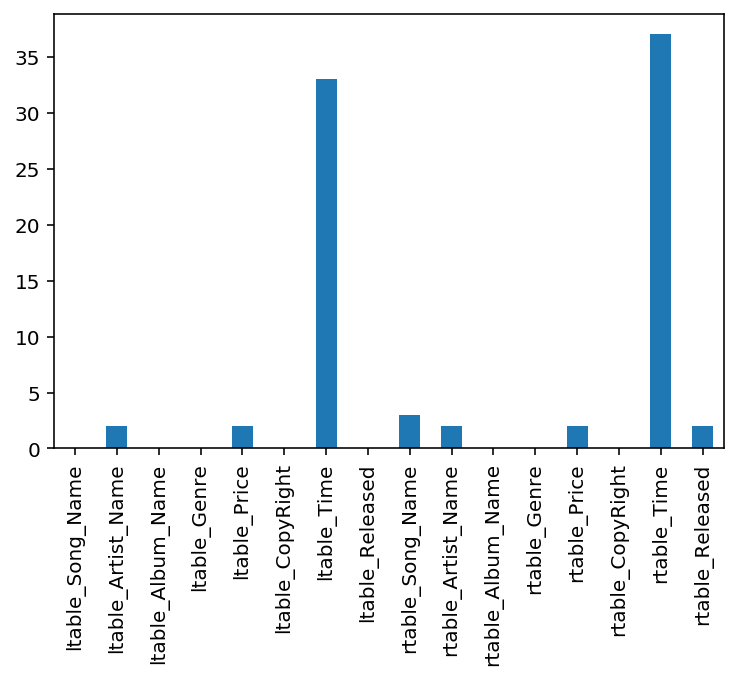

In [7]:
testneg_itunes = pd.read_csv('attacksResults/testneg_itunesamazon.csv')
testneg_itunes.sum().plot.bar()

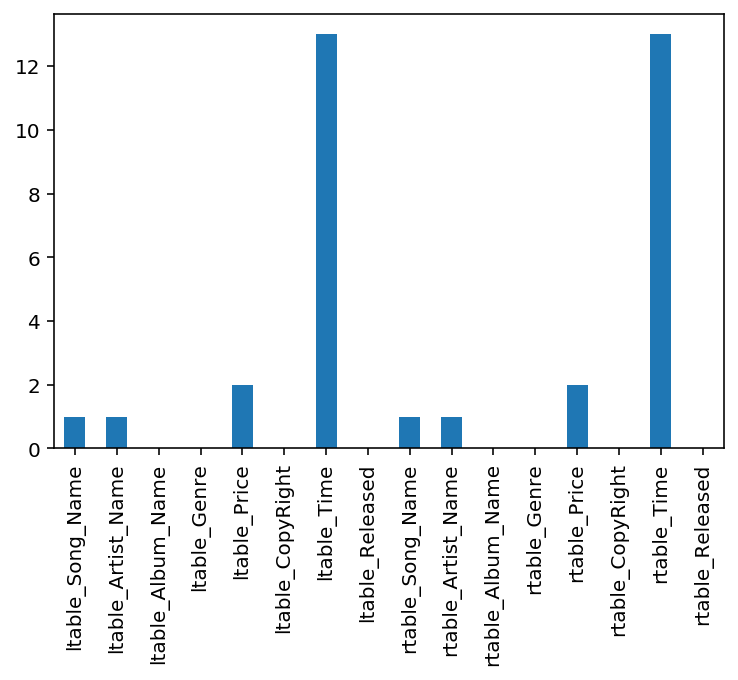

In [9]:
testpos_itunes = pd.read_csv('attacksResults/testpos_itunesamazon.csv')
testpos_itunes.sum().plot.bar()

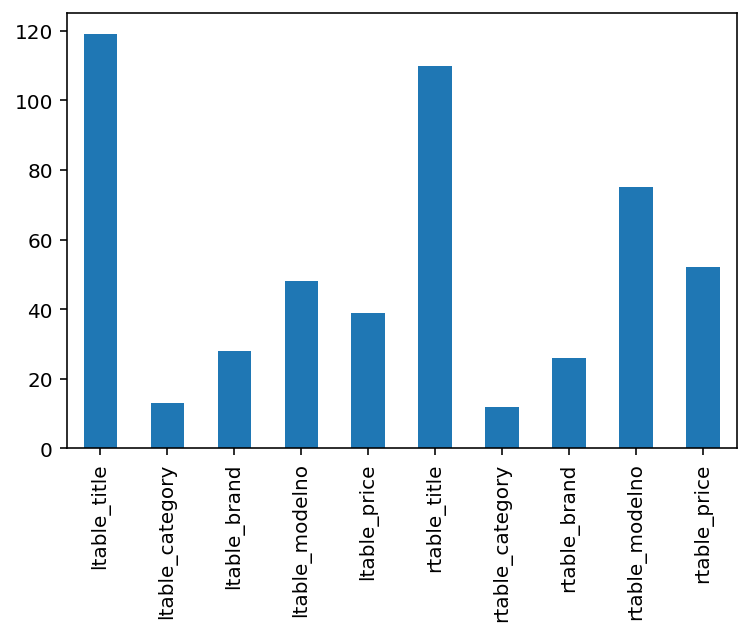

In [10]:
testneg_walmart = pd.read_csv('attacksResults/testneg_walmart.csv')
testneg_walmart.sum().plot.bar()

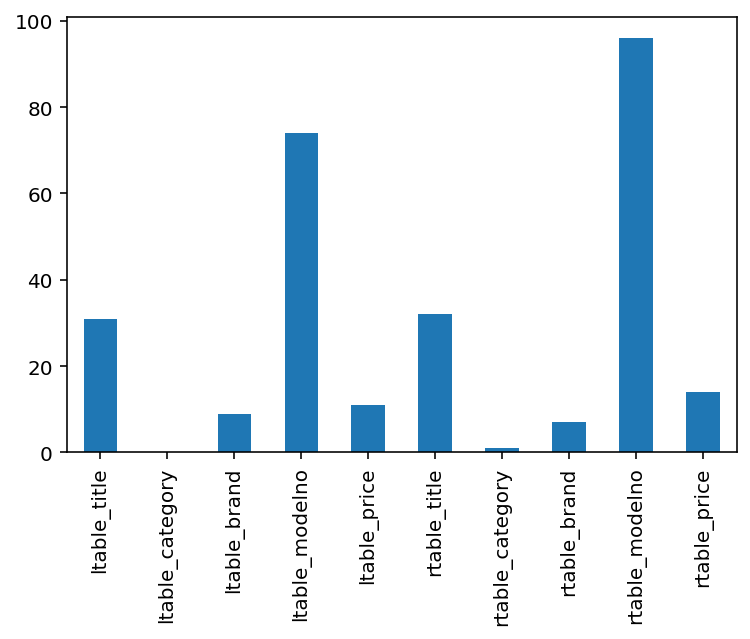

In [14]:
testpos_walmart = pd.read_csv('attacksResults/testpos_walmart.csv')
testpos_walmart.sum().plot.bar()

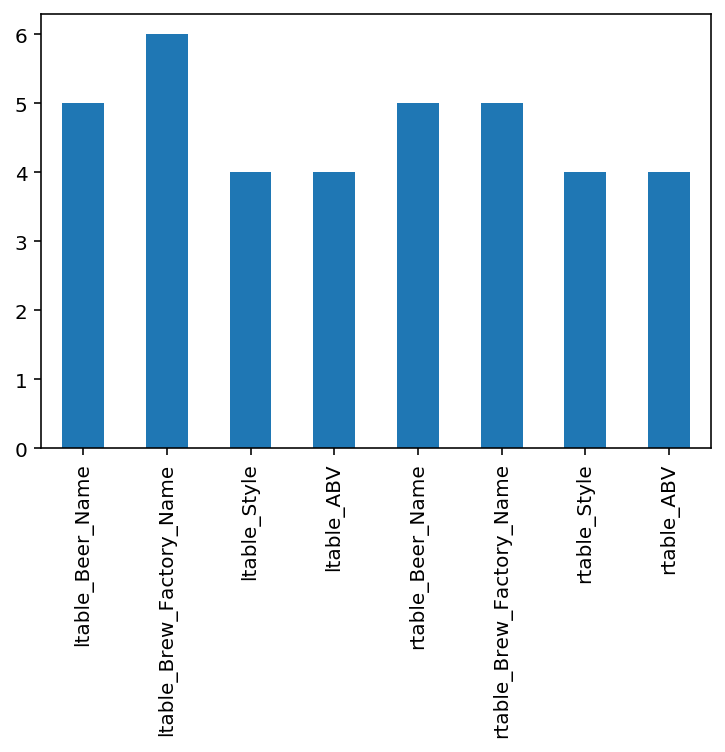

In [15]:
testneg_beer = pd.read_csv('attacksResults/testneg_beer.csv')
testneg_beer.sum().plot.bar()

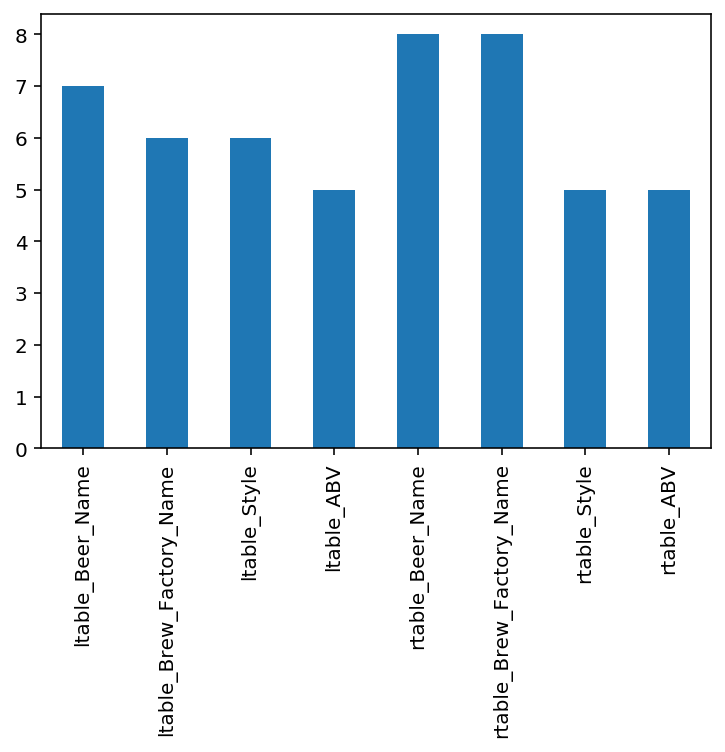

In [16]:
testpos_beer = pd.read_csv('attacksResults/testpos_beer.csv')
testpos_beer.sum().plot.bar()

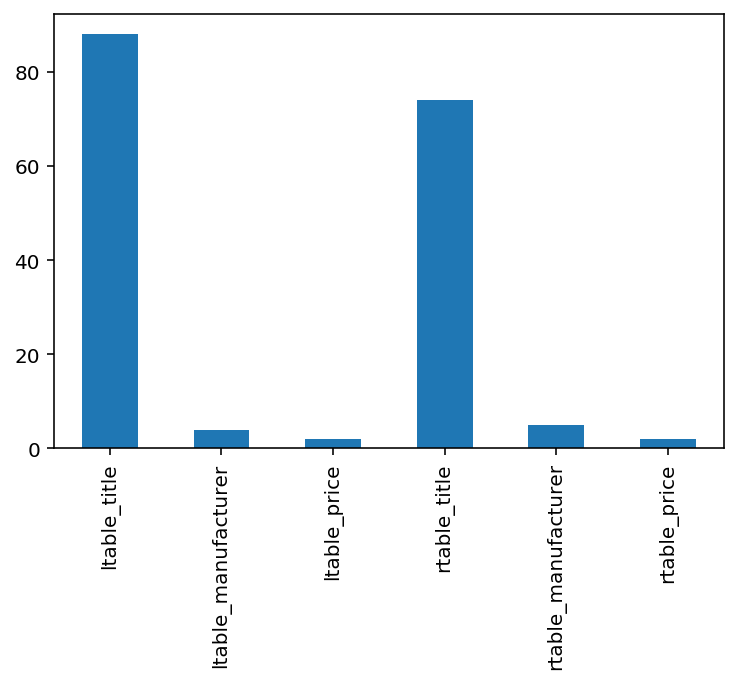

In [17]:
testpos_google = pd.read_csv('attacksResults/testpos_google.csv')
testpos_google.sum().plot.bar()

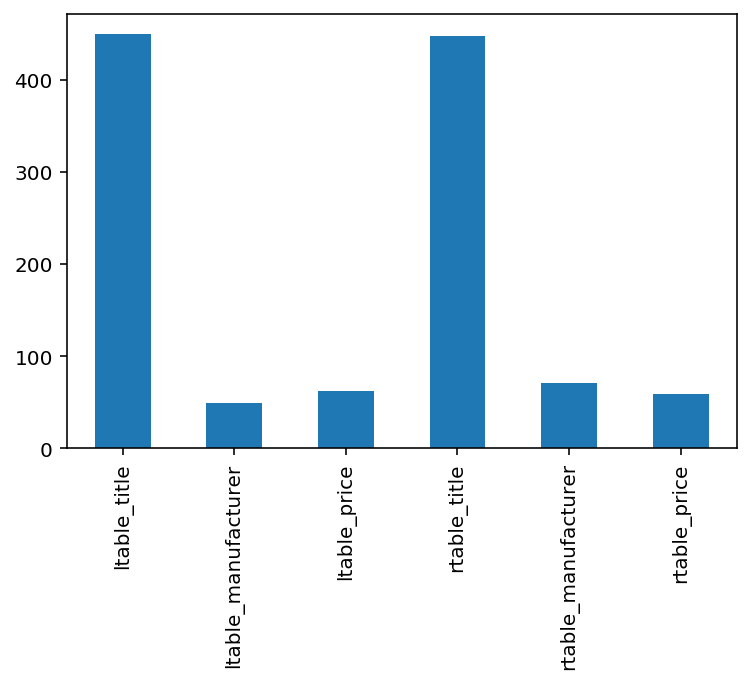

In [18]:
testneg_google = pd.read_csv('attacksResults/testneg_google.csv')
testneg_google.sum().plot.bar()

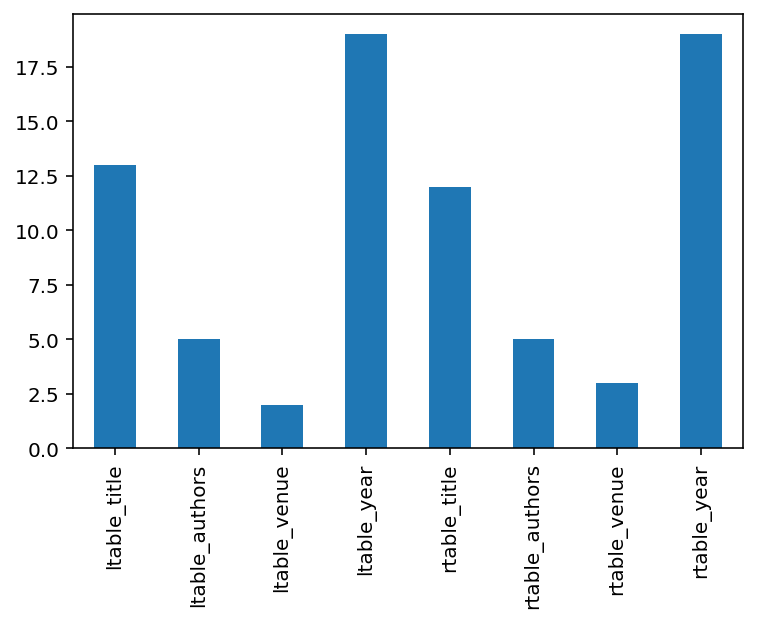

In [20]:
testneg_dblp = pd.read_csv('attacksResults/dblacm_testneg.csv')
testneg_dblp.sum().plot.bar()

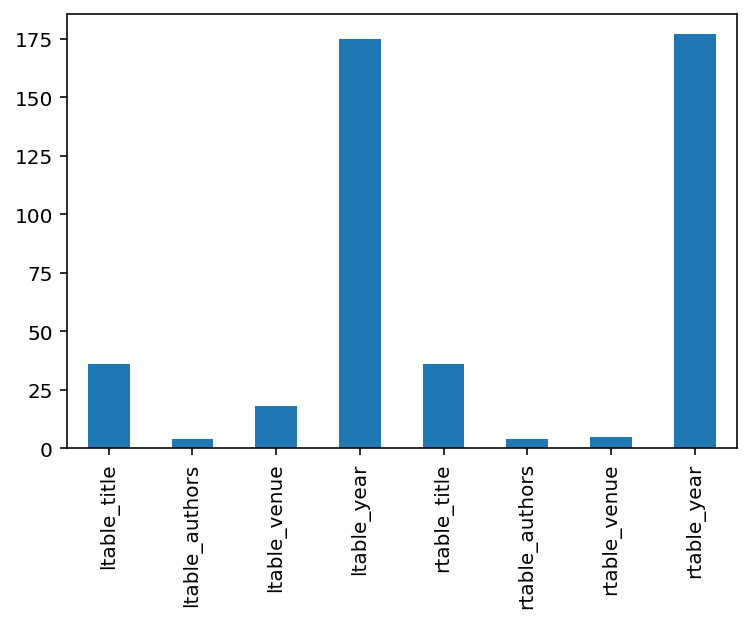

In [21]:
testpos_dblp = pd.read_csv('attacksResults/dblacm_testpos.csv')
testpos_dblp.sum().plot.bar()

## Change word with fasttext

In [35]:
from sklearn.metrics import f1_score,precision_score,recall_score

In [30]:
from utils.attacker import _wrapDm

In [1]:
from gensim.test.utils import datapath
from gensim.models.fasttext import load_facebook_vectors
ftpath = datapath('/home/nvidia/.vector_cache/wiki.en.bin')
ftmodel = load_facebook_vectors(ftpath)

In [19]:
def getMostSimilarWord(word,ftmodel):
    most_similar = ftmodel.similar_by_word(word,topn=1)
    return most_similar[0][0]

In [26]:
def replaceWordsWithMostSimilar(attr,ftmodel):
    words = attr.split()
    newWords = []
    for word in words:
        newWords.append(getMostSimilarWord(word.lower(),ftmodel))
    return " ".join(newWords)

In [28]:
replaceWordsWithMostSimilar('mario rossi',ftmodel)

'luigi coletti'

In [31]:
test_df = pd.read_csv('datasets/Structured/itunes-amazon/merged_test.csv')
attacked_test = test_df.copy()
attacked_test['ltable_Price'] = attacked_test['ltable_Price'].apply(lambda attr:
                                                                    replaceWordsWithMostSimilar(str(attr),ftmodel))

In [32]:
attacked_test.head()

,label,ltable_Song_Name,ltable_Artist_Name,ltable_Album_Name,ltable_Genre,ltable_Price,ltable_CopyRight,ltable_Time,ltable_Released,rtable_Song_Name,rtable_Artist_Name,rtable_Album_Name,rtable_Genre,rtable_Price,rtable_CopyRight,rtable_Time,rtable_Released,id
0,0,Elevator ( feat . Timbaland ),Flo Rida,Mail On Sunday ( Deluxe Version ),"Hip-Hop/Rap , Music , Dirty South",us$ lureen,2008 Atlantic Recording Corporation for the Un...,3:55,17-Mar-08,Money Right ( feat . Rick Ross & Brisco ) [ Ex...,Flo Rida,Mail On Sunday [ Explicit ],Rap & Hip-Hop,$ 1.29,2013 Warner Bros. . Records Inc.,3:17,"March 17 , 2008",731
1,0,The Woodland Realm ( Extended Version ),Howard Shore,The Hobbit : The Desolation of Smaug ( Origina...,"Soundtrack , Music , Soundtrack , Classical , ...","us$ asia,the",‰ ãÑ 2013 WaterTower Music,5:14,10-Dec-13,The High Fells ( Extended Version ),Howard Shore,The Hobbit : The Desolation of Smaug ( Origina...,Soundtracks,$ 1.29,2013 WaterTower Music / Warner Bros. . Enterta...,3:38,"December 10 , 2013",672
2,1,Extra Extra Credit,Wiz Khalifa,Flight School,"Hip-Hop/Rap , Music",us$ polynesian+mythology&hl,2009 Rostrum Records,4:03,17-Apr-09,Extra Extra Credit [ Explicit ],Wiz Khalifa,Flight School [ Explicit ],Rap & Hip-Hop,$ 0.99,2013 Mad Decent,4:03,"April 17 , 2009",669
3,0,Toyfriend ( feat . Wynter Gordon ) [ Continuou...,David Guetta,One Love ( Deluxe Version ),"Dance , Music","us$ asia,the",2010 Gum Prod licence exclusive Parlophone Mus...,2:51,21-Aug-09,Sound Of Letting Go ( Feat . Chris Willis ),David Guetta,One Love ( Deluxe Version ),Dance & Electronic,$ 1.29,( C ) 2014 Swedish House Mafia Holdings Ltd ( ...,3:47,"August 21 , 2009",734
4,0,Dangerous ( feat . Sam Martin ) [ Robin Schulz...,David Guetta,Listen ( Deluxe Version ),"Dance , Music , Rock , House , Electronic , Fr...","us$ asia,the",2014 What A Music Ltd. under exclusive license...,3:20,24-Nov-14,Missing You ( Feat . Novel ; Continuous Mix Ve...,David Guetta,One Love ( Deluxe Version ),Dance & Electronic,$ 1.29,( C ) 2014 Swedish House Mafia Holdings Ltd ( ...,4:59,"August 21 , 2009",699


In [33]:
itunesamazon_model = dm.MatchingModel(attr_summarizer='hybrid')
itunesamazon_model.load_state('models/itunes_amazon_hybrid.pth')

In [43]:
def attackAttribute(dataset,attribute,model,ftmodel):
    attacked_test = dataset.copy()
    attacked_test[attribute] = attacked_test[attribute].apply(lambda attr:
                                                                    replaceWordsWithMostSimilar(str(attr),ftmodel))
    originalPreds = _wrapDm(dataset,model)
    attackPreds = _wrapDm(attacked_test,model)
    originalLabels = list(map(lambda m:round(m),originalPreds['match_score']))
    attackLabels = list(map(lambda m:round(m),originalPreds['match_score']))
    trueLabels = dataset['label']
    return (f1_score(trueLabels,originalLabels),f1_score(trueLabels,attackLabels))

In [45]:
attackAttribute(test_df,'ltable_Price',itunesamazon_model,ftmodel)


Reading and processing data from "temp/test.csv"
0% [############################# ] 100% | ETA: 00:00:00

===>  PREDICT Epoch 6



Reading and processing data from "temp/test.csv"


Finished Epoch 6 || Run Time:    0.6 | Load Time:    0.5 || F1:   0.00 | Prec:   0.00 | Rec:   0.00 || Ex/s:   0.00



0% [############################# ] 100% | ETA: 00:00:00

===>  PREDICT Epoch 6
Finished Epoch 6 || Run Time:    0.6 | Load Time:    0.5 || F1:   0.00 | Prec:   0.00 | Rec:   0.00 || Ex/s:   0.00



(0.7999999999999999, 0.7999999999999999)